In [88]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15), dpi=50)

In [89]:
st = pd.read_csv('teijo_accuracy_1K_100K.csv')[99900:-1]
non_st = pd.read_csv('hiteijo_accuracy_1K_100K.csv')[99900:-1]

In [90]:
no_sync = pd.read_csv('no_sync_non_steady_accuracy_1K_100K.csv')[99900:-1]
no_sync = no_sync.drop("step", axis=1)
no_sync_means = no_sync.mean(axis=0)

In [91]:
st = st.drop("step", axis=1)
non_st = non_st.drop("step", axis=1)
# plt.plot(df)
# plt.show()
st_means = st.mean(axis=0)
non_st_means = non_st.mean(axis=0)

In [92]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(1,1,1)

names = st.columns.values
for i in range(len(names)):
    ax.scatter(st_means[names[i]], non_st_means[names[i]])

In [93]:
#add no sync data to the graph
for i in range(len(names)):
    ax.scatter(st_means[names[i]], no_sync_means[names[i]])
    
# for i,(x,y) in enumerate(zip(st_means , no_sync_means)):
#     ax.annotate(names[i],(x,y))

for i in range(len(names)):
    x = st_means[names[i]]
    y = non_st_means[names[i]]
    dx = 0
    dy = no_sync_means[names[i]] - y
    ax.arrow(x, y, dx, dy, width=0.0002, color='black', head_length=0.0, head_width=0.0)
    #plt.plot(st_means[names[i]], non_st_means[names[i]])
    
for i,(x,y) in enumerate(zip(st_means , no_sync_means)):
    ax.annotate("no sync",(x,y-0.03))

In [94]:
names[3] = 'RS$\gamma$'
names[4] = 'RSopt$\gamma$'
names[1] = 'TS'
for i,(x,y) in enumerate(zip(st_means , non_st_means)):
    ax.annotate(names[i],(x,y+0.01))

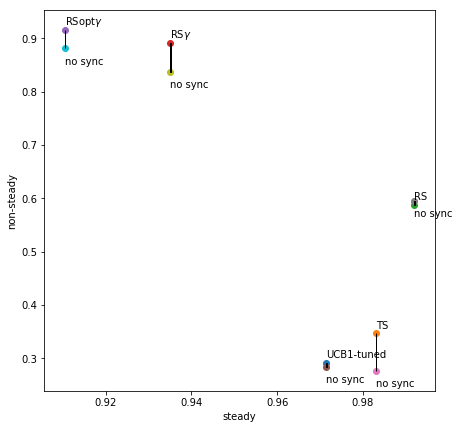

In [95]:
#plt.xlim(0.0, 1.0)
#plt.ylim(0.0, 1.0)
plt.xlabel("steady")
plt.ylabel("non-steady")
plt.show()